In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 1.Find out how many males and females participated in the test

In [50]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

### Observation
#### Number of females participated in the test is 518 and number of males participated in the test is 482

### 2.What do you think about the students' parental level of education?

In [51]:
data['parental level of education'].unique()

array(['some high school', 'high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [52]:
data['parental level of education'].value_counts().reset_index()

,index,parental level of education
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [53]:
parental_edn = data['parental level of education'].value_counts().index
parental_edn

Index(['some college', 'associate's degree', 'high school', 'some high school',
       'bachelor's degree', 'master's degree'],
      dtype='object')

In [54]:
count = data['parental level of education'].value_counts().values
count

array([226, 222, 196, 179, 118,  59], dtype=int64)

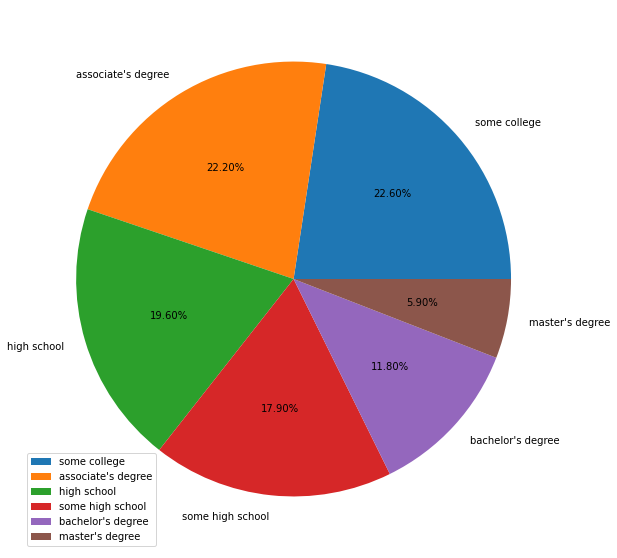

In [55]:
plt.figure(figsize = (11,10))
plt.pie(count,labels = parental_edn,autopct = '%1.2f%%')
plt.legend()
plt.show()

### Observation
#### Most of the parents are graduates.Almost 5.90% of them are having a master's degree.

### 3.Who scores the most on average for math, reading and writing based on a)Gender b)Test preparation course

In [56]:
# Scores based on gender
data.groupby(['gender'])[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


### Observation
#### On the basis of gender,for maths,male students score the highest,for reading,female students are scoring more and for writing
#### also female students are scoring more than male students.

In [57]:
# Scores based on test preparation course
data.groupby(['test preparation course'])[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### Observation
#### On the basis of test preparation course,math score is highest for those who have completed the test preparation course,
#### reading score and writing score is also highest for those who have completed the test preparation course.

### 4. What do you think about the scoring variation for math, reading and writing based on a) Gender b) Test Preparation course


In [58]:
data.groupby(['gender'])[['math score','reading score','writing score']].var()

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


### Observation
#### On the basis of gender,for maths,female students have the highest variance,for reading also,female students have highest variance
#### and for writing also female students are have highest variance than male students.

In [59]:
data.groupby(['test preparation course'])[['math score','reading score','writing score']].var()

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


### Observation
#### On the basis of test preparation course,variance is highest for those who have not completed the test preparation course,
#### reading score and writing score is also highest for those who have not completed the test preparation course.

### 5.The management needs your help to give bonus points to the top 25% of students based on their math
### score, so how will you help the management to achieve this

In [23]:
top_25 = data['math score'].quantile(0.75)
top_25


77.0

In [29]:
math_toppers = data[data['math score'] >= top_25]
math_toppers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


### Observation
#### From the above table,there are 255 students who have scored marks equal to or greater than 77 which are the top 25% of students.